<a href="https://colab.research.google.com/github/harishtlv/Anomali_Detection/blob/main/ONNX_inference_Patchcore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantization

In [1]:
%%bash
git clone https://github.com/openvinotoolkit/anomalib.git

Cloning into 'anomalib'...


In [2]:
%cd anomalib
!pip install -e .
!pip install pytorch-lightning
!pip install lightning
!pip install kornia
!pip install timm
!pip install FrEIA
!pip install open-clip-torch
!pip install openvino
# !pip install onnx
# !pip install nncf

/content/anomalib
Obtaining file:///content/anomalib
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 22.0 MB/s eta 0:00:00
  Building editable for anomalib (pyproject.toml) ... done
  Created wheel for anomalib: filename=anomalib-1.2.0.dev0-0.editable-py3-none-any.whl size=14146 sha256=628d2641ea27151e495a672d86c9f4edd4e594564b7e1f7ed7b667e9fcf9621f
  Stored in directory: /tmp/pip-ephem-wheel-cache-a2q4dugj/wheels/d2/67/5a/24537c94d996a7c04fc11b75dee04161307ba49c2fac3a9bcc
  Created wheel for an

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from logging import root
from anomalib.data.image import MVTec
datamodule = MVTec(category="carpet", root="/content/drive/MyDrive/M_tech_proj/MVTech")

In [ ]:
# from anomalib.data.image import MVTec
from anomalib.models.image import Patchcore
from anomalib.engine import Engine
model = Patchcore()
engine = Engine()
engine.fit(datamodule=datamodule, model=model)

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/core/optimi

┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model                 │ PatchcoreModel           │ 24.9 M │ train │
│ 1 │ _transform            │ Compose                  │      0 │ train │
│ 2 │ normalization_metrics │ MetricCollection         │      0 │ train │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 17                                                                                          
Modules in eval mode: 174

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Output()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/optimization/automatic.py:132: `training_step` 
returned `None`. If this was on purpose, ignore this warning...

Output()

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
exp_root ="/content/drive/MyDrive/M_tech_proj/Model_wts/Patchcore/Quntisation/OpenVINO/INT8_ACQ"

In [ ]:
engine.export(export_root=exp_root, datamodule=datamodule, model=model, export_type=ExportType.OPENVINO,compression_type="INT8")

In [ ]:
from anomalib.deploy.export import CompressionType, ExportType, InferenceModel

In [ ]:
model.to_openvino(
export_root=exp_root,
compression_type=CompressionType.INT8_ACQ,
datamodule=datamodule,
metric="AUROC"
# task=datamodule.test_data.task
)

/content/anomalib/src/anomalib/data/transforms/center_crop.py:57: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if image.numel() == 0:
/content/anomalib/src/anomalib/data/transforms/center_crop.py:61: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if crop_height > image_height or crop_width > image_width:
/content/anomalib/src/anomalib/data/transforms/center_crop.py:41: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Output()

#Inference INT8 (1.64 Sec)

In [6]:
from anomalib import TaskType
import time

In [ ]:
TaskType.SEGMENTATION

In [35]:
from anomalib.deploy.inferencers import OpenVINOInferencer
inferencer = OpenVINOInferencer(
    path="/content/drive/MyDrive/M_tech_proj/Model_wts/Patchcore/Quantization/OpenVINO/INT8/weights/openvino/model.xml",
    metadata="/content/drive/MyDrive/M_tech_proj/Model_wts/Patchcore/Quantization/OpenVINO/INT8/weights/openvino/metadata.json",
    device="CPU",
    task=TaskType.SEGMENTATION
)

In [36]:
from PIL import Image
image = Image.open("/content/drive/MyDrive/M_tech_proj/MVTech/carpet/test/color/000.png")
_ = inferencer.predict(image=image)

In [37]:
iter = 30
time_agg =[]
for i in range(iter):
  start_time= time.time()
  prediction = inferencer.predict(image=image)
  time_agg.append(time.time() - start_time)

print(f"Average inference time: {sum(time_agg)/len(time_agg)}")

Average inference time: 1.6841130256652832


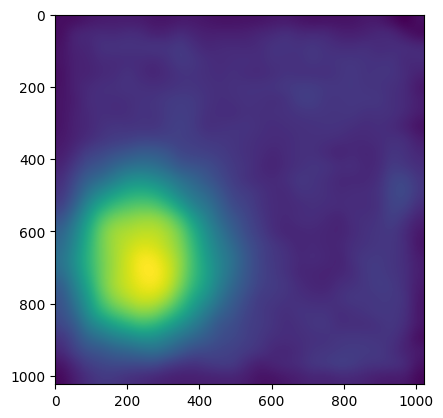

In [23]:
from matplotlib import pyplot as plt
plt.imshow(prediction.anomaly_map)

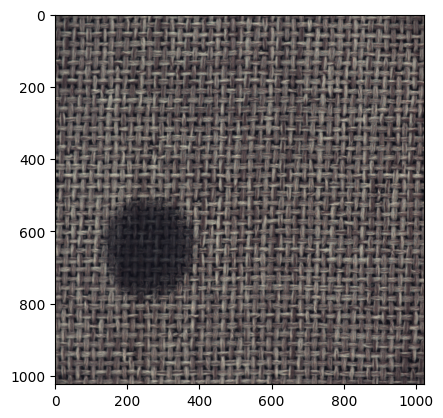

In [24]:
plt.imshow(prediction.image)

#Inference FP16 (2.05 Sec)

In [25]:
from anomalib.deploy.inferencers import OpenVINOInferencer
inferencer = OpenVINOInferencer(
    path="/content/drive/MyDrive/M_tech_proj/Model_wts/Patchcore/Quantization/OpenVINO/FP16/weights/openvino/model.xml",
    metadata="/content/drive/MyDrive/M_tech_proj/Model_wts/Patchcore/Quantization/OpenVINO/FP16/weights/openvino/metadata.json",
    device="CPU",
    task=TaskType.SEGMENTATION
)

In [26]:
from PIL import Image
image = Image.open("/content/drive/MyDrive/M_tech_proj/MVTech/carpet/test/color/000.png")
_ = inferencer.predict(image=image)

In [27]:
iter = 30
time_agg =[]
for i in range(iter):
  start_time= time.time()
  prediction = inferencer.predict(image=image)
  time_agg.append(time.time() - start_time)

print(f"Average inference time: {sum(time_agg)/len(time_agg)}")

Average inference time: 2.0506503184636435


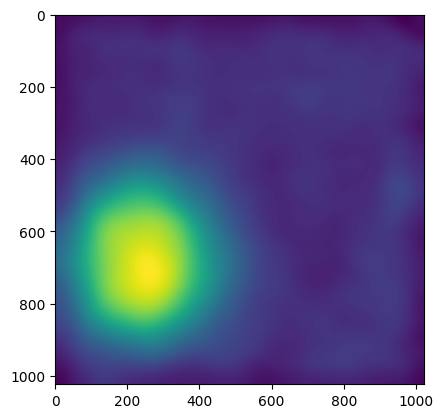

In [28]:
from matplotlib import pyplot as plt
plt.imshow(prediction.anomaly_map)

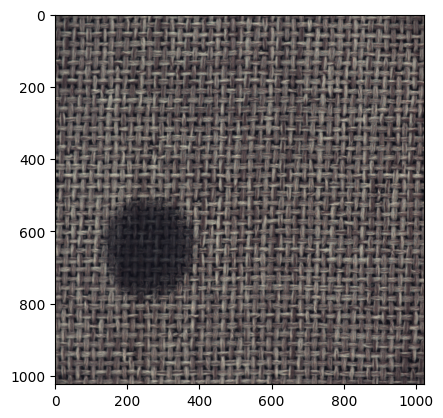

In [29]:
plt.imshow(prediction.image)